# Exercise 2

In [4]:
# Load libraries
import pandas
import time
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
# create dataset of classification task by make_classification
X, y = make_classification(n_samples=100000, random_state=10)
X.shape

In [11]:
# apply random forest without tuning
rf = RandomForestClassifier(n_jobs=1, random_state=10)

In [12]:
# define function_timer to calculate the mean run time of RandomForestClassifier 
def function_timer(func, para1, para2 ,it=5):
    run_times = []
    for i in range(it):
        t0 = time.time()
        func(para1,para2)
        t1 = time.time()
        run_times.append(t1-t0)
    mean_time = np.sum(run_times)/it
    return mean_time

In [16]:
# calculate the mean run time with different number of jobs(1-10)
df = []
for i in range(10):
    n_jobs = i+1
    rf = RandomForestClassifier(n_jobs=n_jobs, random_state=10)
    mean_time = function_timer(rf.fit, para1=X, para2=y)
    row = [n_jobs, mean_time]
    df.append(row)


In [17]:
df = DataFrame(df,columns=['n_jobs', 'run_time'])
df

,n_jobs,run_time
0,1,10.218010
1,2,5.032079
2,3,3.738434
3,4,2.829743
4,5,2.674360
5,6,2.432191
6,7,2.405405
7,8,2.448488
8,9,1.947030
9,10,2.302250


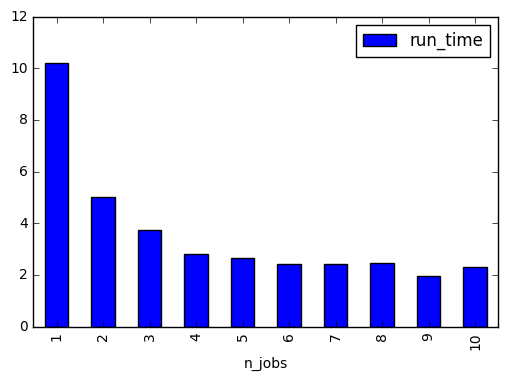

In [18]:
# bar
df.plot.bar(x='n_jobs',y='run_time')
plt.show()

# Exercise 3

In [13]:
# Load libraries
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [29]:
# Dummy dataset from exercise 2 
y
X.shape

(100000, 20)

In [31]:
# Set parameters that will be tuned
tuned_parameters = {
    'criterion':['gini','entropy'], 
    'n_jobs':[5], 
    'min_samples_split':[2,10,100,1000], 
}

In [17]:
# calculate run time of GridSearchCV with different number of jobs(1-10)
run_times = []
for i in range(10):
    n_jobs = i+1
    clf = GridSearchCV(RandomForestClassifier(random_state=10), tuned_parameters, cv=5, n_jobs=n_jobs)
    mean_time = function_timer(clf.fit, para1=X, para2=y, it=2)
    row = [n_jobs, mean_time]
    run_times.append(row)

In [18]:
run_times = DataFrame(run_times,columns=['n_jobs', 'run_time'])
run_times


,n_jobs,run_time
0,1,160.682967
1,2,99.950704
2,3,79.760903
3,4,73.396501
4,5,71.837087
5,6,70.291927
6,7,70.147452
7,8,71.059706
8,9,71.428500
9,10,71.760905


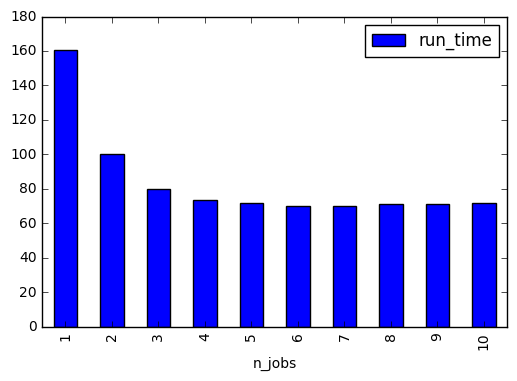

In [19]:
#plot bar
run_times.plot.bar(x='n_jobs',y='run_time')
plt.show()

index     combinations                                                                    score     

1         {'criterion': 'gini', 'min_samples_split': 2, 'n_jobs': 5}                      0.96539   
2         {'criterion': 'gini', 'min_samples_split': 10, 'n_jobs': 5}                     0.96686   
3         {'criterion': 'gini', 'min_samples_split': 100, 'n_jobs': 5}                    0.96793   
4         {'criterion': 'gini', 'min_samples_split': 1000, 'n_jobs': 5}                   0.96688   
5         {'criterion': 'entropy', 'min_samples_split': 2, 'n_jobs': 5}                   0.96636   
6         {'criterion': 'entropy', 'min_samples_split': 10, 'n_jobs': 5}                  0.96683   
7         {'criterion': 'entropy', 'min_samples_split': 100, 'n_jobs': 5}                 0.96762   
8         {'criterion': 'entropy', 'min_samples_split': 1000, 'n_jobs': 5}                0.9666    


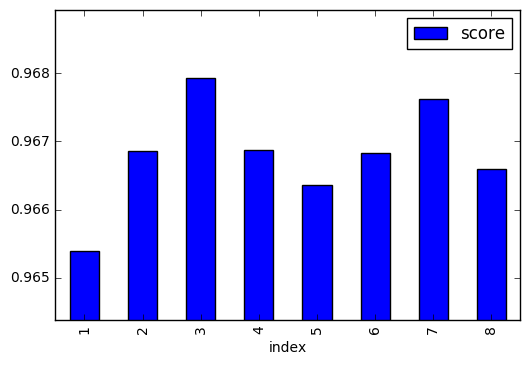

In [110]:
# calculate grid score for each combination of parameters

rf = RandomForestClassifier(n_jobs=5, random_state=10)
clf = GridSearchCV(rf, tuned_parameters, cv=5, n_jobs=4)
clf.fit(X, y)


# combinations of parameters
print('{:<10}{:<80}{:<10}'.format('index', 'combinations', 'scores') )
print()
i = 0
summary = []
for element in clf.grid_scores_:
    i = i+1
    print('{:<10}{:<80}{:<10}'.format(str(i), str(element[0]), str(element[1])) )
    row = [i, element[1]]
    summary.append(row)
    
summary = DataFrame(summary,columns=['index', 'score'])


#plot bar
summary_plot = summary.plot.bar(x='index',y='score')
bottom = np.min(summary.score)-0.001
top = np.max(summary.score)+0.001
summary_plot.set_ylim(bottom, top)
plt.show()

In [109]:
print('the best combination of parameters is:')
print(clf.best_params_)

the best combination of parameters is:
{'criterion': 'gini', 'min_samples_split': 100, 'n_jobs': 5}


# Exercise 4

In [166]:
# Load libraries
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [117]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
dataset = pandas.read_csv(url,header=None)

#shape
print(dataset.shape)
dataset.head()

(569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [148]:
# encode labels
le = LabelEncoder()
le.fit(dataset[1])
dataset[1] = le.transform(dataset[1])
print(dataset.head())

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [157]:
# features and target
X_cols = [i for i in dataset.columns if i!=1]
X = dataset[X_cols]
y = dataset[1]
# split dataset into train and test (0.8:0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [185]:
# pipeline
pca = PCA(n_components='mle')
pipe_PCA = Pipeline([
        ('preprocessing', StandardScaler()),
        ('reduce_dim', pca),
        ('classify', LogisticRegression(C=1000.0, random_state=10))
    ])

In [197]:
# use RFE to reduce dimentions
#estimator_LR = LogisticRegression(C=1000.0, random_state=10)
estimator_SVR = SVR(kernel='linear')
rfe = RFECV(estimator_SVR, cv=5, step=1)
pipe_RFE = Pipeline([
        ('preprocessing', StandardScaler()),
        ('reduce_dim', rfe),
        ('classify', LogisticRegression(C=1000.0, random_state=10))
    ])


In [198]:
# run this pipelilne
pipe_PCA.fit(X_train, y_train)
pipe_RFE.fit(X_train, y_train)

# compare the scores
print("compare the scores")
score_PCA = pipe_PCA.score(X_test, y_test)
score_RFE = pipe_RFE.score(X_test, y_test)
print("PCA : %f   RFE : %f" % (score_PCA, score_RFE) )

compare the scores
PCA : 0.964912   RFE : 0.956140


In [217]:
print("original features :")
cols = [i for i in X_train.columns]
print(cols)
selected_features = [cols[i] for i in cols if rfe.support_[i]]
print()
print("selected features : ")
print(selected_features)

original features :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

selected features : 
[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 24, 26, 27, 28, 30]


# Exercise 5

In [128]:
# Load libraries
import pandas as pd
import numpy as np
import pyspark
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.ml.linalg import Vectors
from pyspark.sql import SQLContext 
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StandardScaler
from sklearn.datasets import make_classification
from pyspark.ml.feature import PCA 
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [129]:
# create dataset of classification task by make_classification
X, y = make_classification(n_samples=270000, random_state=10)
print(X.shape)
n_cols = X.shape[1]

rdd_X = sc.parallelize(X.tolist())
rdd_y = sc.parallelize(y.tolist())

# convert to dense vectors
rdd_X = rdd_X.map(lambda x: Vectors.dense(x))
rdd_X_y = rdd_X.zip(rdd_y)
df_spark = rdd_X_y.toDF(['features', 'label'])
df_spark.first()

(270000, 20)


Row(features=DenseVector([0.6782, -2.0566, -2.0146, 1.3263, 1.1372, 0.0683, 0.5962, 0.4326, -1.7961, -0.6488, 0.367, -1.3136, -1.1133, -0.1154, -0.2009, -0.2819, 0.8028, -0.4964, 0.5274, 0.3736]), label=1)

In [130]:
# split into train and test
train, test = df_spark.randomSplit([0.9, 0.1], seed=12345)
# features and label
X_train = df_spark.select(df_spark['features'])
y_train = df_spark.select(df_spark['label'])

In [131]:
# define pipeline stages
# standard scaler
standardizer = StandardScaler(inputCol="features", outputCol="scaled_features", withMean=True, withStd=True)
# pca
pca = PCA(inputCol=standardizer.getOutputCol(), outputCol="pca_features")
# logistic regression
lr = LogisticRegression()
# pipeline
pipeline = Pipeline(stages=[standardizer, pca, lr])
# grid search cv
paramGrid = ParamGridBuilder()\
    .addGrid(pca.k, [15, 18, 20])\
    .addGrid(lr.regParam, [0.1, 0.01])\
    .build()
bi_evaluator = BinaryClassificationEvaluator()
# in practice numfolds should larger than 3
crossval = CrossValidator(estimator=pipeline, 
                          estimatorParamMaps= paramGrid, 
                          evaluator=bi_evaluator,
                         numFolds=2)


In [132]:
# run cross validation, and choose the best parameters
cvModel = crossval.fit(train)

In [133]:
avg_metrics = cvModel.avgMetrics
print(avg_metrics)
i = 0
print("parameters : average metrics")
for element in cvModel.getEstimatorParamMaps():
    params = element.values()
    print('pca.k = %d, lr.regParam = %f : %d' % (params[0], params[1], avg_metrics[i]))
    i = i+1


[0.9353517597141795, 0.9353517597141836, 0.9353517597141823, 0.9380881562588322, 0.9380881562588346, 0.9380881562588327]
parameters : average metrics
pca.k = 0, lr.regParam = 15.000000 : 0
pca.k = 0, lr.regParam = 18.000000 : 0
pca.k = 0, lr.regParam = 20.000000 : 0
pca.k = 0, lr.regParam = 15.000000 : 0
pca.k = 0, lr.regParam = 18.000000 : 0
pca.k = 0, lr.regParam = 20.000000 : 0


In [134]:
# prediction
prediction = cvModel.transform(test)
selected = prediction.select('features', 'label', 'prediction')
selected.show()
print("BinaryClassificationEvaluator : %f" % bi_evaluator.evaluate(prediction) )

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|[-3.6836636061578...|    1|       0.0|
|[-3.5908329465748...|    0|       1.0|
|[-3.1028414890178...|    1|       1.0|
|[-3.0254229859830...|    1|       0.0|
|[-3.0016291449966...|    1|       0.0|
|[-2.9954155618652...|    0|       0.0|
|[-2.9748887731748...|    1|       1.0|
|[-2.9091182531441...|    0|       0.0|
|[-2.9079349375685...|    1|       1.0|
|[-2.9033988595131...|    0|       0.0|
|[-2.8476527323188...|    1|       1.0|
|[-2.8006398250931...|    1|       0.0|
|[-2.7988274093271...|    0|       0.0|
|[-2.7936712980095...|    0|       0.0|
|[-2.7645305410424...|    0|       0.0|
|[-2.7623235963028...|    1|       1.0|
|[-2.7219557323469...|    1|       1.0|
|[-2.7193560000870...|    0|       0.0|
|[-2.7034135305295...|    0|       0.0|
|[-2.6763504109131...|    0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows

BinaryClassifi